In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
clas6_all = pd.read_csv('clas6/clas6_all.txt')
clas6_all.head()

,Q2,x,z,pT2,phi,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_bnxs,tra_rcxs,tra_rcxs_err,Fac_bnxs,Fac_rcxs,Fac_rcxs_err
0,1.49,0.1468,0.0682,0.0049,-0.174533,0.010338,0.003383,0.028800,1.1437,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
1,1.49,0.1468,0.0682,0.0049,0.174533,0.010447,0.003276,0.029105,1.1437,0.000511,0.000132,1.607906e-07,0.000000,0.000000,0.000000e+00
2,1.49,0.1468,0.0682,0.0259,-2.967060,0.007477,0.000581,0.000945,1.0944,0.000467,0.000122,1.512178e-07,0.004125,0.004293,8.164685e-08
3,1.49,0.1468,0.0682,0.0259,-2.617994,0.007098,0.001826,0.000896,1.1008,0.000466,0.000121,1.448981e-07,0.004125,0.004293,8.164685e-08
4,1.49,0.1468,0.0682,0.0259,-2.268928,0.006618,0.000392,0.000835,1.1139,0.000465,0.000121,1.249906e-07,0.004125,0.004293,8.164685e-08


In [3]:
clas6_all[clas6_all['data_xs_RC']>0].describe()

,Q2,x,z,pT2,phi,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_bnxs,tra_rcxs,tra_rcxs_err,Fac_bnxs,Fac_rcxs,Fac_rcxs_err
count,112302.000000,112302.000000,112302.000000,112302.000000,112302.000000,1.123020e+05,1.123020e+05,1.123020e+05,112302.000000,1.123020e+05,1.123020e+05,1.123020e+05,112302.000000,112302.000000,1.123020e+05
mean,2.886744,0.432844,0.390926,0.173208,0.000087,6.747359e-05,1.126057e-05,1.168438e-05,0.972223,2.021898e-05,5.051569e-06,3.164154e-09,0.000118,0.000109,3.664394e-09
std,1.058439,0.162969,0.190251,0.217199,1.674359,2.548843e-04,5.973649e-05,1.777771e-04,0.080681,4.109878e-05,1.147130e-05,1.145410e-08,0.000296,0.000285,8.299501e-09
min,1.490000,0.146800,0.068200,0.004900,-2.967060,1.550900e-08,1.076025e-08,2.506000e-09,0.657400,-6.780785e-08,-8.385386e-09,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.020000,0.302500,0.236200,0.025900,-1.221730,2.834562e-06,5.309062e-07,3.925500e-07,0.924200,1.290063e-06,2.170230e-07,4.198404e-11,0.000002,0.000002,6.220086e-11
50%,2.370000,0.413400,0.374800,0.065500,0.174533,1.048338e-05,1.680512e-06,1.460275e-06,0.963300,4.975457e-06,9.560441e-07,3.004715e-10,0.000018,0.000015,6.137342e-10
75%,3.420000,0.539700,0.539700,0.216500,1.221730,3.940437e-05,5.967875e-06,5.463375e-06,1.008700,1.878777e-05,4.121288e-06,1.504936e-09,0.000088,0.000077,3.090385e-09
max,6.610000,0.906300,0.906300,1.554000,2.967060,1.044725e-02,5.952500e-03,2.910500e-02,2.725600,5.106698e-04,1.463571e-04,2.354447e-07,0.004401,0.004518,1.189620e-07


In [4]:
file=open('clas6/clas6_include_residual','w')
file.write('Q2,x,z,pT2,phi,data_xs,data_xs_err,xs_data_sys_err,data_xs_RC,tra_rc,residual\n')
for i,row in clas6_all.iterrows():
    xb=row['x']
    Q2=row['Q2']
    z=row['z']
    pT2=row['pT2']
    phih=row['phi']
    data_xs=row['data_xs']
    data_xs_err = row['data_xs_err']
    data_xs_sys = row['data_xs_sys']
    data_xs_RC = row['data_xs_RC']
    data_xs_beforeRC = data_xs/data_xs_RC
    tra_bn = xb*2*5.75*0.938272*row['tra_bnxs']
    tra_rc = tra_bn-xb*2*5.75*0.938272*row['tra_rcxs']
    if tra_rc!=0:
        residual = (data_xs-tra_rc)/data_xs
        file.write('%f,%f,%f,%f,%f,%E,%E,%E,%E,%E,%E\n'%(Q2,xb,z,pT2,phih,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_rc,residual))


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_9313/4102309405.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  data_xs_beforeRC = data_xs/data_xs_RC


In [5]:
clas6_residual = pd.read_csv('clas6/clas6_include_residual')
clas6_residual.head()



,Q2,x,z,pT2,phi,data_xs,data_xs_err,xs_data_sys_err,data_xs_RC,tra_rc,residual
0,1.49,0.1468,0.0682,0.0049,0.174533,0.010447,0.003276,0.029105,1.1437,0.000600,0.942531
1,1.49,0.1468,0.0682,0.0259,-2.967060,0.007477,0.000581,0.000945,1.0944,0.000547,0.926881
2,1.49,0.1468,0.0682,0.0259,-2.617994,0.007098,0.001826,0.000896,1.1008,0.000546,0.923049
3,1.49,0.1468,0.0682,0.0259,-2.268928,0.006618,0.000392,0.000835,1.1139,0.000545,0.917601
4,1.49,0.1468,0.0682,0.0259,-1.919862,0.006758,0.000644,0.000852,1.1340,0.000544,0.919477


In [21]:
#i_Q2,i_x,i_z,i_pT2,i_phi = (3,7,12,4,10)
Q2_l,z_l,x_l,pT2_l,phih_l=(2,0.4,0.25,0.2,-0.3)
Q2_r,z_r,x_r,pT2_r,phih_r=(3.5,0.7,0.6,0.6,0.3)

In [22]:
Residual=clas6_residual[(clas6_residual['Q2']>Q2_l)&(clas6_residual['Q2']<Q2_r)&(clas6_residual['z']>z_l)&(clas6_residual['z']<z_r)&(clas6_residual['x']>x_l)&(clas6_residual['x']<x_r)&(clas6_residual['pT2']>pT2_l)&(clas6_residual['pT2']<pT2_r)&(clas6_residual['phi']>phih_l)&(clas6_residual['phi']<phih_r)]['residual'].to_list()

#print(Residual)

(array([ 1.,  1.,  3.,  1.,  4.,  3.,  1.,  5.,  5.,  2.,  7.,  3.,  2.,
         7.,  6., 14.,  7., 22., 14., 21., 14., 33., 26., 21., 36., 36.,
        27., 36., 35., 31., 32., 40., 40., 43., 29., 38., 42., 49., 38.,
        44., 28., 25., 19., 21.,  5.,  8.,  4.,  5.,  1.,  0.]),
 array([-2.  , -1.94, -1.88, -1.82, -1.76, -1.7 , -1.64, -1.58, -1.52,
        -1.46, -1.4 , -1.34, -1.28, -1.22, -1.16, -1.1 , -1.04, -0.98,
        -0.92, -0.86, -0.8 , -0.74, -0.68, -0.62, -0.56, -0.5 , -0.44,
        -0.38, -0.32, -0.26, -0.2 , -0.14, -0.08, -0.02,  0.04,  0.1 ,
         0.16,  0.22,  0.28,  0.34,  0.4 ,  0.46,  0.52,  0.58,  0.64,
         0.7 ,  0.76,  0.82,  0.88,  0.94,  1.  ]),
 <BarContainer object of 50 artists>)

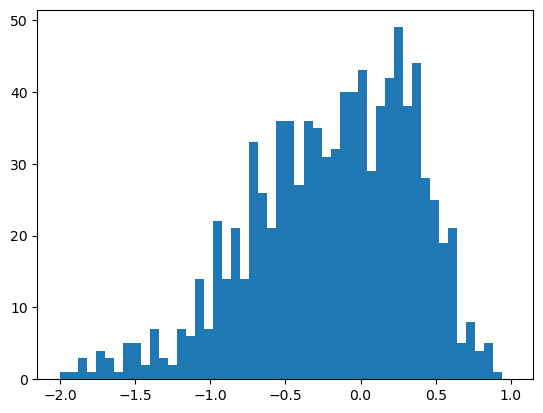

In [23]:
plt.hist(Residual,50,range=[-2,1])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
for i,row in clas6_all[(clas6_all['data_xs_RC']>0)&(clas6_all['tra_rcxs']>0)].iterrows():
    xb=row['x']
    Q2=row['Q2']
    z=row['z']
    pT2=row['pT2']
    phih=row['phi']
    data_xs=row['data_xs']
    data_xs_err = row['data_xs_err']
    data_xs_sys = row['data_xs_sys']
    data_xs_RC = row['data_xs_RC']
    tra_bn = xb*2*5.75*0.938272*row['tra_bnxs']
    tra_rc = tra_bn-xb*2*5.75*0.938272*row['tra_rcxs']
    if tra_rc==0:
        print('Trc RC is 0 ',i)
    else:
        data_xs_beforeRC = data_xs/data_xs_RC
        residual = (data_xs-tra_rc)/tra_rc
        plt.plot(xb,residual,'bo')
        #ax.plot([xb,xb],[residual-data_xs_err/tra_rc,residual+data_xs_err/tra_rc],color='blue',marker='_')
plt.ylim(-2,10)
plt.xlabel('xb')
plt.ylabel('residual')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
for i,row in clas6_all[(clas6_all['data_xs_RC']>0)&(clas6_all['tra_rcxs']>0)].iterrows():
    xb=row['x']
    Q2=row['Q2']
    z=row['z']
    pT2=row['pT2']
    phih=row['phi']
    data_xs=row['data_xs']
    data_xs_err = row['data_xs_err']
    data_xs_sys = row['data_xs_sys']
    data_xs_RC = row['data_xs_RC']
    tra_rc = xb*2*5.75*0.938272*row['tra_rcxs']
    if tra_rc==0:
        print('Trc RC is 0 ',i)
    else:
        data_xs_beforeRC = data_xs/data_xs_RC
        residual = (data_xs-tra_rc)/tra_rc
        plt.plot(z,residual,'bo')
        #ax.plot([z,z],[residual-data_xs_err/tra_rc,residual+data_xs_err/tra_rc],color='blue',marker='_')
plt.ylim(-2,10)
plt.xlabel('z')
plt.ylabel('residual')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
for i,row in clas6_all[(clas6_all['data_xs_RC']>0)&(clas6_all['tra_rcxs']>0)].iterrows():
    xb=row['x']
    Q2=row['Q2']
    z=row['z']
    pT2=row['pT2']
    phih=row['phi']
    data_xs=row['data_xs']
    data_xs_err = row['data_xs_err']
    data_xs_sys = row['data_xs_sys']
    data_xs_RC = row['data_xs_RC']
    tra_rc = xb*2*5.75*0.938272*row['tra_rcxs']
    if tra_rc==0:
        print('Trc RC is 0 ',i)
    else:
        data_xs_beforeRC = data_xs/data_xs_RC
        residual = (data_xs-tra_rc)/tra_rc
        plt.plot(pT2,residual,'bo')
        #ax.plot([pT2,pT2],[residual-data_xs_err/tra_rc,residual+data_xs_err/tra_rc],color='blue',marker='_')
plt.ylim(-2,10)
plt.xlabel('pT2')
plt.ylabel('residual')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
for i,row in clas6_all[(clas6_all['data_xs_RC']>0)&(clas6_all['tra_rcxs']>0)].iterrows():
    xb=row['x']
    Q2=row['Q2']
    z=row['z']
    pT2=row['pT2']
    phih=row['phi']
    data_xs=row['data_xs']
    data_xs_err = row['data_xs_err']
    data_xs_sys = row['data_xs_sys']
    data_xs_RC = row['data_xs_RC']
    tra_rc = xb*2*5.75*0.938272*row['tra_rcxs']
    if tra_rc==0:
        print('Trc RC is 0 ',i)
    else:
        data_xs_beforeRC = data_xs/data_xs_RC
        residual = (data_xs-tra_rc)/tra_rc
        plt.plot(Q2,residual,'bo')
        #ax.plot([Q2,Q2],[residual-data_xs_err/tra_rc,residual+data_xs_err/tra_rc],color='blue',marker='_')
plt.ylim(-2,10)
plt.xlabel('Q2')
plt.ylabel('residual')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
for i,row in clas6_all[(clas6_all['data_xs_RC']>0)&(clas6_all['tra_rcxs']>0)].iterrows():
    xb=row['x']
    Q2=row['Q2']
    z=row['z']
    pT2=row['pT2']
    phih=row['phi']
    data_xs=row['data_xs']
    data_xs_err = row['data_xs_err']
    data_xs_sys = row['data_xs_sys']
    data_xs_RC = row['data_xs_RC']
    tra_rc = xb*2*5.75*0.938272*row['tra_rcxs']
    if tra_rc==0:
        print('Trc RC is 0 ',i)
    else:
        data_xs_beforeRC = data_xs/data_xs_RC
        residual = (data_xs-tra_rc)/tra_rc
        plt.plot(phih,residual,'bo')
        #ax.plot([phih,phih],[residual-data_xs_err/tra_rc,residual+data_xs_err/tra_rc],color='blue',marker='_')
plt.ylim(-2,10)
plt.xlabel('phih')
plt.ylabel('residual')